<a href="https://colab.research.google.com/github/Sathsarani0412/Dyscalculia_Detection_App_Hapan_Mithuro-/blob/main/model2_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving attention_dataset (1).csv to attention_dataset (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("attention_dataset (1).csv")
df.head()


,activity10_score,activity10_time_sec,activity11_score,activity11_time_sec,accuracy_rate,skip_rate,attention_impairment
0,1,2,0,0,0.5,0.5,yes
1,1,7,0,0,0.5,0.5,yes
2,1,7,0,0,0.5,0.5,yes
3,0,0,0,0,0.0,1.0,yes
4,1,5,0,0,0.5,0.5,yes


In [3]:
df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   activity10_score      168 non-null    int64  
 1   activity10_time_sec   168 non-null    int64  
 2   activity11_score      168 non-null    int64  
 3   activity11_time_sec   168 non-null    int64  
 4   accuracy_rate         168 non-null    float64
 5   skip_rate             168 non-null    float64
 6   attention_impairment  168 non-null    object 
dtypes: float64(2), int64(4), object(1)
memory usage: 9.3+ KB
activity10_score        0
activity10_time_sec     0
activity11_score        0
activity11_time_sec     0
accuracy_rate           0
skip_rate               0
attention_impairment    0
dtype: int64


In [4]:
df = df.fillna(df.median(numeric_only=True))


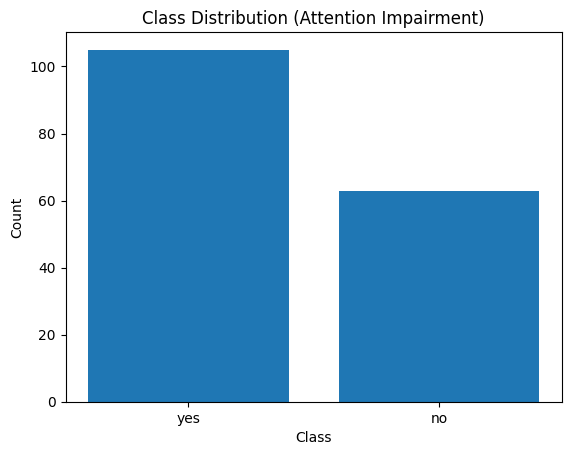

In [5]:
import matplotlib.pyplot as plt

class_counts = df["attention_impairment"].value_counts()

plt.bar(class_counts.index, class_counts.values)
plt.title("Class Distribution (Attention Impairment)")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


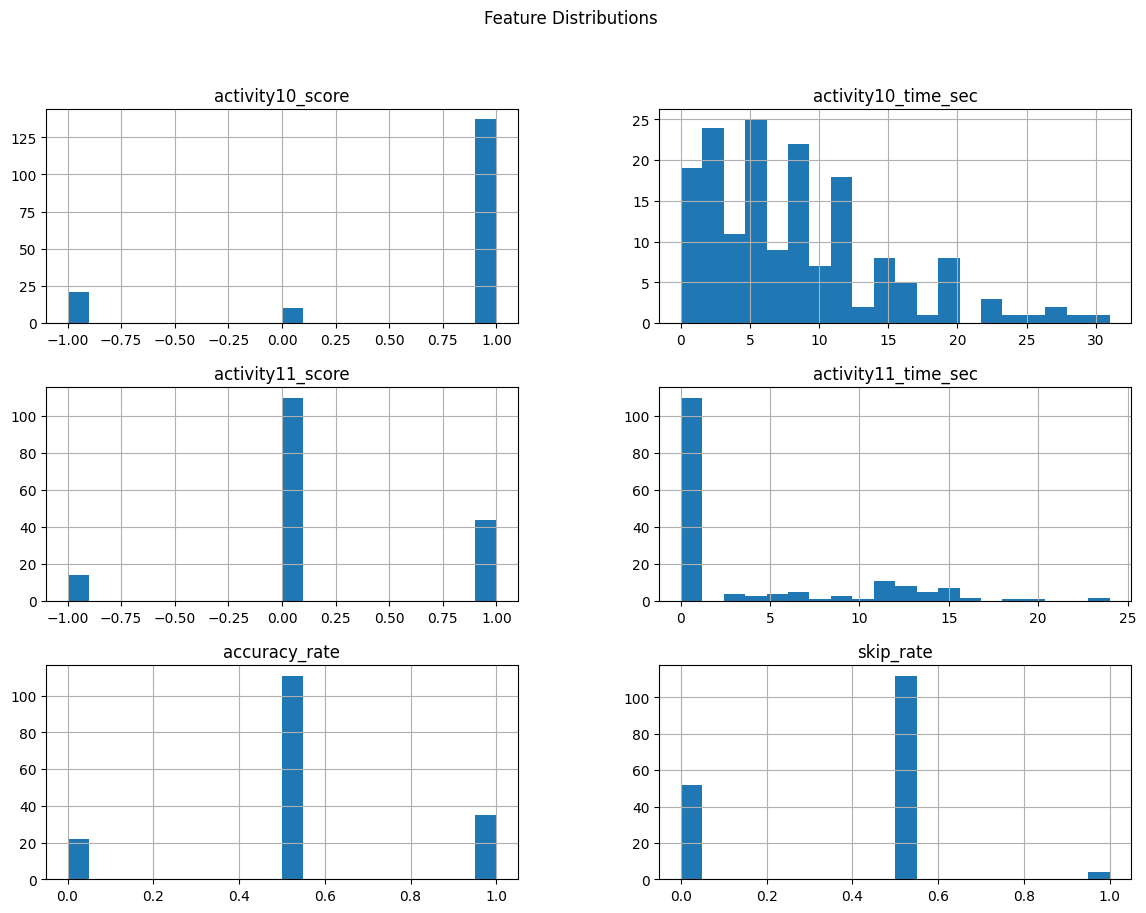

In [6]:
df.drop(columns=["attention_impairment"]).hist(
    figsize=(14,10), bins=20
)
plt.suptitle("Feature Distributions")
plt.show()


In [8]:
label_map = {"no": 0, "yes": 1}
df["attention_impairment"] = df["attention_impairment"].map(label_map)


In [9]:
X = df.drop(columns=["attention_impairment"])
y = df["attention_impairment"]


In [10]:
from sklearn.model_selection import train_test_split

# Train + temp
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

# Validation + test
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42
)

print("Train:", y_train.value_counts())
print("Validation:", y_val.value_counts())
print("Test:", y_test.value_counts())


Train: attention_impairment
1    73
0    44
Name: count, dtype: int64
Validation: attention_impairment
1    16
0     9
Name: count, dtype: int64
Test: attention_impairment
1    16
0    10
Name: count, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

In [21]:
from sklearn.metrics import accuracy_score

models = {
    "Random Forest": rf,

}

train_acc = []
test_acc = []

for name, model in models.items():
    train_acc.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc.append(accuracy_score(y_test, model.predict(X_test)))


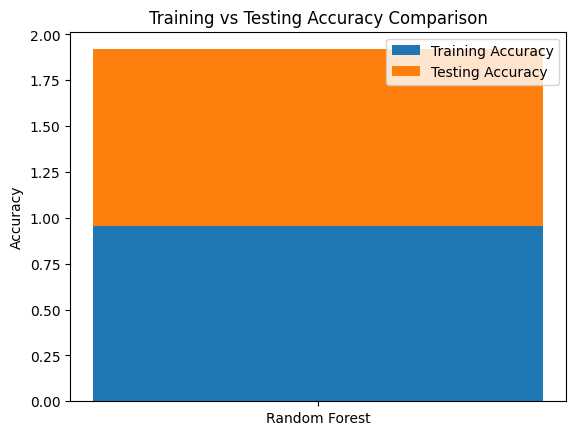

In [22]:
plt.bar(models.keys(), train_acc, label="Training Accuracy")
plt.bar(models.keys(), test_acc, bottom=train_acc, label="Testing Accuracy")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy Comparison")
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import classification_report, confusion_matrix

best_model = rf  # ← replace with model that performs best

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9615384615384616

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26


Confusion Matrix:
 [[10  0]
 [ 1 15]]


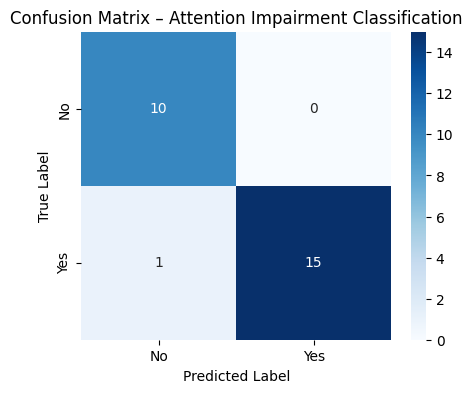

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No", "Yes"],
    yticklabels=["No", "Yes"]
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix – Attention Impairment Classification")
plt.show()


In [26]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

best_model = rf  # or svm / dt based on results

y_pred = best_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:\n")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.9615384615384616

Classification Report:

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        10
           1       1.00      0.94      0.97        16

    accuracy                           0.96        26
   macro avg       0.95      0.97      0.96        26
weighted avg       0.97      0.96      0.96        26


Confusion Matrix:

[[10  0]
 [ 1 15]]


In [27]:
print("Training Accuracy:", accuracy_score(y_train, best_model.predict(X_train)))
print("Testing Accuracy:", accuracy_score(y_test, y_pred))


Training Accuracy: 0.9572649572649573
Testing Accuracy: 0.9615384615384616


In [28]:
import joblib

joblib.dump(best_model, "attention_model.pkl")
joblib.dump(X.columns.tolist(), "feature_names.pkl")


['feature_names.pkl']

In [29]:
import joblib
import pandas as pd

model = joblib.load("attention_model.pkl")
feature_names = joblib.load("feature_names.pkl")

input_data = pd.DataFrame([{
    "activity10_score": 1,
    "activity10_time_sec": 45,
    "activity11_score": -1,
    "activity11_time_sec": 60,
    "accuracy_rate": 0.50,
    "skip_rate": 0.00
}])

input_data = input_data[feature_names]

prediction = model.predict(input_data)[0]

label_reverse = {0: "No Attention Impairment", 1: "Attention Impairment"}

print("Predicted Attention Status:", label_reverse[prediction])


Predicted Attention Status: No Attention Impairment
